Project 2 Statistical Learning

Learning Outcomes:
● Exploratory Data Analysis
● Practicing statistics using Python
● Hypothesis testing

In [1]:
'''Performing EDA on Medical costs record set 
1. Importing needed python libs'''
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chisquare,chi2_contingency

In [2]:
'''2. Reading the dataset
Assuming predefined set of missing values'''
missing=['','-','na','NA','N/A']
medicalRec = pd.read_csv('insurance (1).csv', na_values=missing)
medicalRec

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
#3.1 Shape of data set
print('Shape of data set', medicalRec.shape) # 1338 rows by 7 columns

Shape of data set (1338, 7)


In [4]:
#3.2 Data type of each data attribute
medicalRec.dtypes  # 3 Categorical columns, 4 Numerical columns

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
#3.3 Detecting missing values
print(medicalRec.isnull().sum())
print(medicalRec.isna().sum())
#As seen we dont have any missing values present that we can detect using simple panda based tests

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [18]:
'''3.4 finding 5 point summary of numerical values'''
medicalRec.describe() #describe function lists all statistical values for Numerical columns. Specially 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
'''As shown above the 5 point summary consits of [min , 25%, 50% (Median), 75% and max] '''

In [ ]:
'''Observations on 5 point summary
1. Age, bmi and children seems to have normal distribution looking at the mean and median values for those.
2. Charges seems to have fairly distant values for mean and median and not a normal but skewed distribution.
3. Since the mean > median for charges it is a right skewed distribution and median should be the center for Charges.
'''

In [ ]:
#3.5 Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

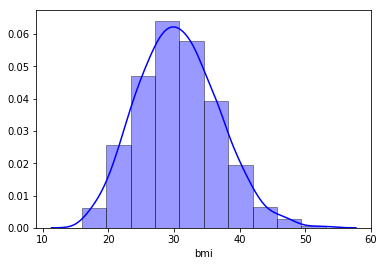

In [8]:
sns.distplot(medicalRec['bmi'], hist=True, kde=True, bins=10, color = 'blue', hist_kws={'edgecolor':'black'});

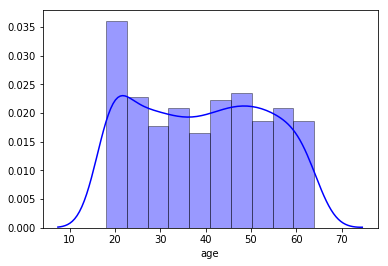

In [13]:
sns.distplot(medicalRec['age'], hist=True, kde=True, bins=10, color = 'blue', hist_kws={'edgecolor':'black'});

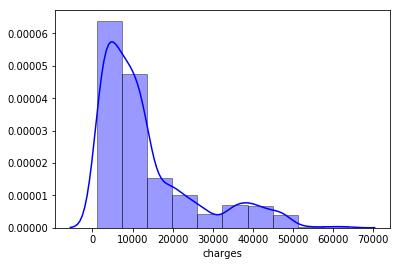

In [14]:
sns.distplot(medicalRec['charges'], hist=True, kde=True, bins=10, color = 'blue', hist_kws={'edgecolor':'black'});

In [24]:
# 3.6 Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

medicalRec[['bmi','age','charges']].skew(axis=0)

bmi        0.284047
age        0.055673
charges    1.515880
dtype: float64

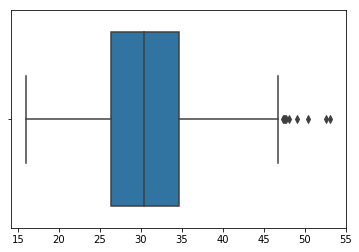

In [10]:
# 3.7 Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
sns.boxplot(x=medicalRec[['bmi']]); # Box plot shoes the outliers > Q3 + 1.5 * IQR

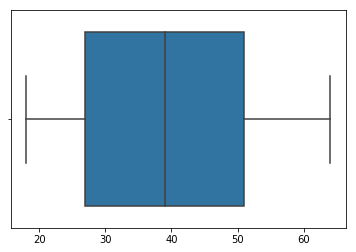

In [11]:
sns.boxplot(x=medicalRec[['age']]); # No outliers present for age

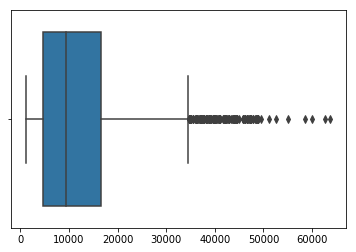

In [12]:
sns.boxplot(x=medicalRec[['charges']]); # Huge accumulation of outliers > Q3 + 1.5 * IQR

In [44]:
'''Observations on outliers
As per the observations using boxplot we can observe the outliers for bmi and charges.
No outliers present for age'''

'Observations on outliers\nAs per the observations using boxplot we can observe the outliers for bmi and charges.\nNo outliers present for age'

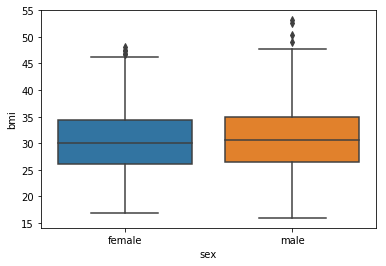

In [64]:
#3.8 Distribution of categorical columns (include children)
sns.boxplot(x='sex', y='bmi', data=medicalRec);

'''Majority falls in the range of 26 to 35(slightly less) of BMI index. Some outliers in both category
of genders where males clearly surpasses females as far as being high on BMI''' 

'SouthEast population seems to high on BMI index comparatively followed by southwest population'

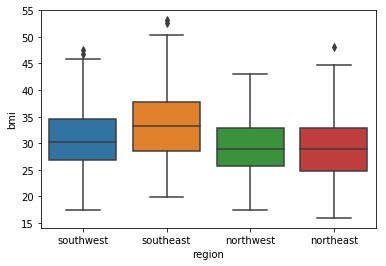

In [70]:
sns.boxplot(x='region', y='bmi', data=medicalRec);


'''SouthEast population seems to high on BMI index comparatively followed by southwest population'''

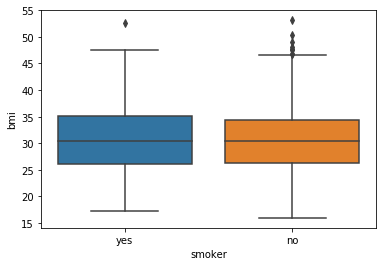

In [71]:
sns.boxplot(x='smoker', y='bmi', data=medicalRec);
'''smoking habbit does seem to impact much on the BMI of a person.'''

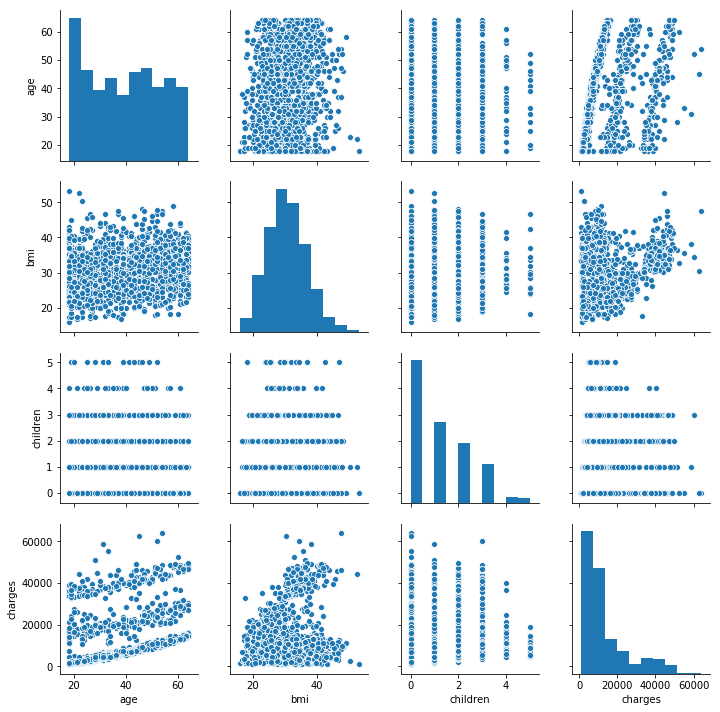

In [5]:
#3.9 Pair plot that includes all the columns of the data frame
sns.pairplot(medicalRec);

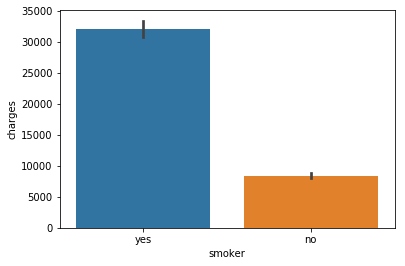

In [8]:
#4.a Do charges of people who smoke differ significantly from the people who don't?

sns.barplot(x='smoker', y='charges', data=medicalRec);
#Clearly the charges of smokers are far too high compared to non smokers

Median for smokers  34456.348450000005


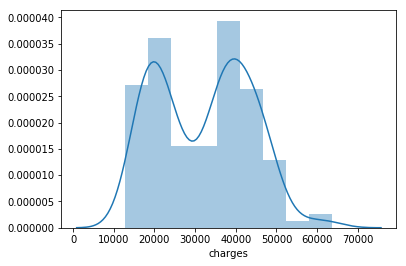

In [24]:
print('Median for smokers ' ,medicalRec[medicalRec['smoker'] == 'yes']['charges'].median())
sns.distplot(medicalRec[medicalRec['smoker'] == 'yes']['charges']);

Median for non smokers  7345.4053


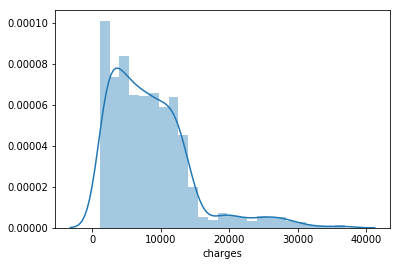

In [41]:
print('Median for non smokers ',medicalRec[medicalRec['smoker'] == 'no']['charges'].median())
sns.distplot(medicalRec[medicalRec['smoker'] == 'no']['charges']);

In [ ]:
'''As observed the distribution for charges is right skewed and median for smokers are distant from non smokers'''

In [43]:
'''
H0:muN = mu
HN:muN != mu
performing 2 sample testing.
Assumptions made level of significance 0.05
'''

tstats,pVal=stats.ttest_ind(medicalRec[medicalRec['smoker'] == 'yes']['charges'],
                            medicalRec[medicalRec['smoker'] == 'no']['charges']) 
print("T-Statistics ",tstats , " P-Value " , pVal)

T-Statistics  46.664921172723716  P-Value  8.271435842177219e-283


In [ ]:
#Clery the p-value is less than level of significance and hence we can reject the Null hypothesis

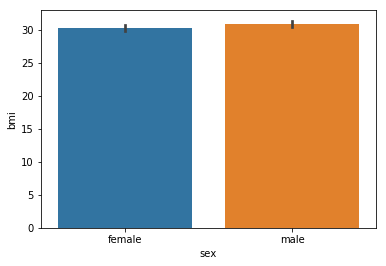

In [19]:
#4.b Does bmi of males differ significantly from that of females?
sns.barplot(x='sex', y='bmi', data=medicalRec);
#No difference seen between both gender category

In [44]:
'''H0: muN = mu 
HN: muN != mu
performing two sample testing
Assumption the level of significance as 0.05
'''

tstats,pVal=stats.ttest_ind(medicalRec[medicalRec['sex'] == 'male']['bmi'],
                            medicalRec[medicalRec['sex'] == 'female']['bmi']) 
print("T-Statistics ",tstats , " P-Value " , pVal)

T-Statistics  1.696752635752224  P-Value  0.08997637178984932


In [45]:
#Cleary the pvalue is higher than level of significance(0.05). Hence accepting the null hypothesis.

In [ ]:
'''4.c Is the proportion of smokers significantly different
in different genders?
'''

In [ ]:
'''Dealing with two categorical variables see relationship between them. If we consider the chi square test

H0: Proportion of smokers are different in different genders
HN: Proportion of smokers are same in different genders'''

In [13]:
cont = pd.crosstab(medicalRec["smoker"],
                   medicalRec["sex"])

In [14]:
cont

sex,female,male
smoker,,
no,547,517
yes,115,159


In [15]:
chi2_contingency(cont)# As observed the P value is greated than 0.05 hence accepting the null hypothesis.

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 537.56651719],
        [135.56651719, 138.43348281]]))

In [13]:
'''4.d Is the distribution of bmi across women with no
children, one child and two children, the same'''

'4.d Is the distribution of bmi across women with no\nchildren, one child and two children, the same'

C:\swdtools\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


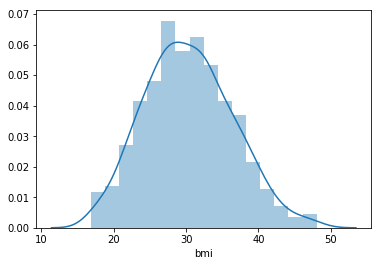

In [17]:
sns.distplot(medicalRec[medicalRec['sex'] == 'female'][medicalRec['children'] < 3]['bmi']);

In [21]:
femaledata=medicalRec[medicalRec['sex'] == 'female'][medicalRec['children'] < 3];

C:\swdtools\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


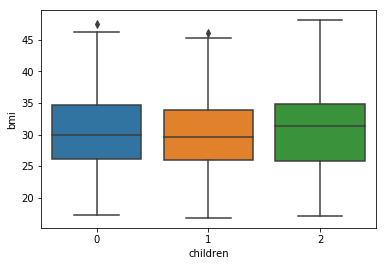

In [22]:
sns.boxplot(x='children', y='bmi', data=femaledata);

In [33]:
femaledata.describe()

,age,bmi,children,charges
count,566.000000,566.000000,566.000000,566.000000
mean,39.125442,30.335910,0.699647,12405.058539
std,14.310470,6.055825,0.794828,11358.829450
min,18.000000,16.815000,0.000000,1607.510100
25%,26.000000,26.053750,0.000000,4371.572437
50%,39.500000,29.972500,0.000000,9041.613500
75%,51.000000,34.437500,1.000000,14399.313138
max,64.000000,48.070000,2.000000,63770.428010


In [ ]:
'''Observations 
Looking at the frequency distribution the sample of females with less than 3 children follows normal distribution for BMI
box plot shows the median to fairly close and is verified with describe function on the subdata of females'''